In [1]:
import numpy as np
from os.path import basename
from micromlgen import port
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Update the list of CSV filenames
fileNames = ["a.csv","b.csv","c.csv","d.csv","e.csv","f.csv","g.csv","h.csv","i.csv","j.csv",
             "k.csv","l.csv","m.csv","n.csv","o.csv","p.csv","q.csv","r.csv","s.csv","t.csv",
             "u.csv","v.csv","w.csv","x.csv","y.csv","z.csv","relax.csv",
             "hello.csv","me.csv","help.csv","thanks.csv"]

def load_features(files):
    dataset = None
    classmap = {}
    for class_idx, filename in enumerate(files):
        class_name = basename(filename)[:-4]
        classmap[class_idx] = class_name
        samples = np.genfromtxt(filename, delimiter=',', filling_values=0.0)
        labels = np.ones((len(samples), 1)) * class_idx
        samples = np.hstack((samples, labels))
        dataset = samples if dataset is None else np.vstack((dataset, samples))

    return dataset, classmap

def get_classifier(features):
    X, y = features[:, :-1], features[:, -1]

    return RandomForestClassifier(20, max_depth=10).fit(X, y)

if __name__ == '__main__':
    features, _ = load_features(fileNames)
    combined_data_shape = features.shape
    print("Shape of the combined data:", combined_data_shape)

    classifier = get_classifier(features)

    # Split data into features and labels
    X, y = features[:, :-1], features[:, -1]

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train the classifier
    classifier.fit(X_train, y_train)

    # Make predictions
    y_train_pred = classifier.predict(X_train)
    y_test_pred = classifier.predict(X_test)

    # Calculate accuracy
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    print("Training Accuracy:", train_accuracy)
    print("Testing Accuracy:", test_accuracy)

    c_code = port(classifier)

    print("Writing to a file")

    modelFile = open("model.h", "w")
    modelFile.write(c_code)
    modelFile.close()

    print("Model file created")


Shape of the combined data: (79930, 24)
Training Accuracy: 0.9926967346428125
Testing Accuracy: 0.9908670086325535
Writing to a file
Model file created


In [2]:
import numpy as np
from os.path import basename
from micromlgen import port
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Update the list of CSV filenames to include "baba.csv"
fileNames = ["a.csv","b.csv","c.csv","d.csv","e.csv","f.csv","g.csv","h.csv","i.csv","j.csv",
             "k.csv","l.csv","m.csv","n.csv","o.csv","p.csv","q.csv","r.csv","s.csv","t.csv",
             "u.csv","v.csv","w.csv","x.csv","y.csv","z.csv","relax.csv",
             "hello.csv","me.csv","help.csv","thanks.csv", "baba.csv"]

def load_features(files):
    dataset = None
    classmap = {}
    for class_idx, filename in enumerate(files):
        class_name = basename(filename)[:-4]
        classmap[class_idx] = class_name
        samples = np.genfromtxt(filename, delimiter=',', filling_values=0.0)
        labels = np.ones((len(samples), 1)) * class_idx
        samples = np.hstack((samples, labels))
        dataset = samples if dataset is None else np.vstack((dataset, samples))

    return dataset, classmap

def get_classifier(features):
    X, y = features[:, :-1], features[:, -1]

    return RandomForestClassifier(20, max_depth=10).fit(X, y)

if __name__ == '__main__':
    features, _ = load_features(fileNames)
    combined_data_shape = features.shape
    print("Shape of the combined data:", combined_data_shape)

    classifier = get_classifier(features)

    # Split data into features and labels
    X, y = features[:, :-1], features[:, -1]

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train the classifier
    classifier.fit(X_train, y_train)

    # Make predictions
    y_train_pred = classifier.predict(X_train)
    y_test_pred = classifier.predict(X_test)

    # Calculate accuracy
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    print("Training Accuracy:", train_accuracy)
    print("Testing Accuracy:", test_accuracy)

    c_code = port(classifier)

    print("Writing to a file")

    modelFile = open("model.h", "w")
    modelFile.write(c_code)
    modelFile.close()

    print("Model file created")


Shape of the combined data: (82523, 24)
Training Accuracy: 0.990169347753643
Testing Accuracy: 0.9881853983641321
Writing to a file
Model file created


In [11]:
X_test.shape


(15986, 23)

Confusion Matrix:
[[612   0   0 ...   0   0   0]
 [  0 459   0 ...   0   0   0]
 [  0   0 578 ...   0   0   0]
 ...
 [  0   0   0 ... 424   0   0]
 [  0   0   0 ...   0 385   0]
 [  0   0   0 ...   0   1 427]]


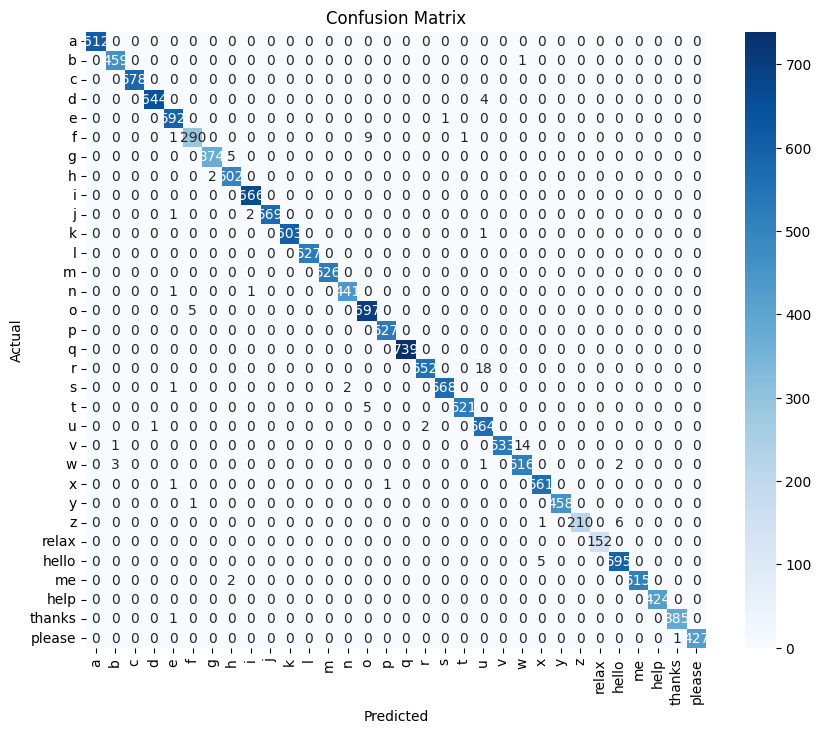

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from os.path import basename
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from micromlgen import port

fileNames = ["a.csv","b.csv","c.csv","d.csv","e.csv","f.csv","g.csv","h.csv","i.csv","j.csv",
             "k.csv","l.csv","m.csv","n.csv","o.csv","p.csv","q.csv","r.csv","s.csv","t.csv",
             "u.csv","v.csv","w.csv","x.csv","y.csv","z.csv","relax.csv",
             "hello.csv","me.csv","help.csv","thanks.csv","please.csv"]

def load_features(files):
    dataset = None
    classmap = {}
    for class_idx, filename in enumerate(files):
        class_name = basename(filename)[:-4]
        classmap[class_idx] = class_name
        samples = np.genfromtxt(filename, delimiter=',', filling_values=0.0)
        labels = np.ones((len(samples), 1)) * class_idx
        samples = np.hstack((samples, labels))
        dataset = samples if dataset is None else np.vstack((dataset, samples))

    return dataset, classmap

def get_classifier(features):
    X, y = features[:, :-1], features[:, -1]
    return RandomForestClassifier(20, max_depth=10).fit(X, y)

if __name__ == '__main__':
    features, classmap = load_features(fileNames)
    X_train, X_test, y_train, y_test = train_test_split(features[:, :-1], features[:, -1], test_size=0.2, random_state=42)

    classifier = get_classifier(features)
    y_pred = classifier.predict(X_test)
    
    # Generate confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(cm)
    
    # Plot confusion matrix with labels
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classmap.values(), yticklabels=classmap.values())
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()


In [22]:
y_train.shape,y_pred.shape,X.shape,y.shape



((65724,), (16431,), (79930, 23), (79930,))

In [5]:
import numpy as np
from os.path import basename
from sklearn.ensemble import RandomForestClassifier
from micromlgen import port

fileNames = ["a.csv","b.csv","c.csv","d.csv","e.csv","f.csv","g.csv","h.csv","i.csv","j.csv",
             "k.csv","l.csv","m.csv","n.csv","o.csv","p.csv","q.csv","r.csv","s.csv","t.csv",
             "u.csv","v.csv","w.csv","x.csv","y.csv","z.csv","relax.csv",
             "hello.csv","me.csv","help.csv","thanks.csv","please.csv"]

def load_features(files):
    dataset = None
    classmap = {}
    for class_idx, filename in enumerate(files):
        class_name = basename(filename)[:-4]
        classmap[class_idx] = class_name
        samples = np.genfromtxt(filename, delimiter=',', filling_values=0.0)
        labels = np.ones((len(samples), 1)) * class_idx
        samples = np.hstack((samples, labels))
        dataset = samples if dataset is None else np.vstack((dataset, samples))

    return dataset, classmap

def get_classifier(features):
    X, y = features[:, :-1], features[:, -1]

    return RandomForestClassifier(20, max_depth=10).fit(X, y)

if __name__ == '__main__':
    features, classmap = load_features(fileNames)
    classifier = get_classifier(features)
    c_code = port(classifier, classmap=classmap)

    print("Writing to a file")

    with open("model.h", "w") as modelFile:
        modelFile.write(c_code)

    print("Model file created")


Writing to a file
Model file created


In [3]:
import numpy as np
from os.path import basename
from sklearn.ensemble import RandomForestClassifier
from micromlgen import port

# Update the list of CSV filenames to include "baba.csv"
fileNames = ["a.csv","b.csv","c.csv","d.csv","e.csv","f.csv","g.csv","h.csv","i.csv","j.csv",
             "k.csv","l.csv","m.csv","n.csv","o.csv","p.csv","q.csv","r.csv","s.csv","t.csv",
             "u.csv","v.csv","w.csv","x.csv","y.csv","z.csv","relax.csv",
             "hello.csv","me.csv","help.csv","thanks.csv","please.csv", "baba.csv"]

def load_features(files):
    dataset = None
    classmap = {}
    for class_idx, filename in enumerate(files):
        class_name = basename(filename)[:-4]
        classmap[class_idx] = class_name
        samples = np.genfromtxt(filename, delimiter=',', filling_values=0.0)
        labels = np.ones((len(samples), 1)) * class_idx
        samples = np.hstack((samples, labels))
        dataset = samples if dataset is None else np.vstack((dataset, samples))

    return dataset, classmap

def get_classifier(features):
    X, y = features[:, :-1], features[:, -1]

    return RandomForestClassifier(20, max_depth=10).fit(X, y)

if __name__ == '__main__':
    features, classmap = load_features(fileNames)
    classifier = get_classifier(features)
    c_code = port(classifier, classmap=classmap)

    print("Writing to a file")

    with open("model.h", "w") as modelFile:
        modelFile.write(c_code)

    print("Model file created")


Writing to a file
Model file created


: 

In [ ]:
import numpy as np
from os.path import basename
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

fileNames = ["a.csv", "b.csv", "c.csv", "d.csv", "e.csv", "f.csv", "g.csv", "h.csv", "i.csv", "j.csv",
             "k.csv", "l.csv", "m.csv", "n.csv", "o.csv", "p.csv", "q.csv", "r.csv", "s.csv", "t.csv",
             "u.csv", "v.csv", "w.csv", "x.csv", "y.csv", "z.csv", "relax.csv",
             "hello.csv", "me.csv", "help.csv", "thanks.csv", "please.csv"]

def load_features(files):
    dataset = None
    classmap = {}
    for class_idx, filename in enumerate(files):
        class_name = basename(filename)[:-4]
        classmap[class_idx] = class_name
        samples = np.genfromtxt(filename, delimiter=',', filling_values=0.0)
        labels = np.ones((len(samples), 1)) * class_idx
        samples = np.hstack((samples, labels))
        dataset = samples if dataset is None else np.vstack((dataset, samples))

    return dataset, classmap

def train_model(model, X_train, y_train, X_test, y_test):
    accuracies = []
    iterations = []
    for i in range(1, 101):  # 100 iterations
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)
        iterations.append(i)
    return accuracies, iterations

if __name__ == '__main__':
    features, classmap = load_features(fileNames)
    X, y = features[:, :-1], features[:, -1]

    # Splitting the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train and record accuracy vs. training iterations for each model
    models = {
        'Random Forest': RandomForestClassifier(n_estimators=100),
        'SVM': SVC(),
        'KNN': KNeighborsClassifier(),
        'Logistic Regression': LogisticRegression(max_iter=100),
        'Decision Tree': DecisionTreeClassifier()
    }

    plt.figure(figsize=(10, 6))
    for name, model in models.items():
        accuracies, iterations = train_model(model, X_train, y_train, X_test, y_test)
        plt.plot(iterations, accuracies, label=name)

    plt.xlabel('Training Iterations')
    plt.ylabel('Accuracy')
    plt.title('Accuracy vs. Training Iterations for Different Models')
    plt.legend()
    plt.grid(True)
    plt.show()


In [1]:
import numpy as np
from os.path import basename
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

fileNames = ["a.csv","b.csv","c.csv","d.csv","e.csv","f.csv","g.csv","h.csv","i.csv","j.csv",
             "k.csv","l.csv","m.csv","n.csv","o.csv","p.csv","q.csv","r.csv","s.csv","t.csv",
             "u.csv","v.csv","w.csv","x.csv","y.csv","z.csv","relax.csv",
             "hello.csv","me.csv","help.csv","thanks.csv","please.csv"]

def load_features(files):
    dataset = None
    classmap = {}
    for class_idx, filename in enumerate(files):
        class_name = basename(filename)[:-4]
        classmap[class_idx] = class_name
        samples = np.genfromtxt(filename, delimiter=',', filling_values=0.0)
        labels = np.ones((len(samples), 1)) * class_idx
        samples = np.hstack((samples, labels))
        dataset = samples if dataset is None else np.vstack((dataset, samples))

    return dataset, classmap

def train_classifier(classifier, features):
    X, y = features[:, :-1], features[:, -1]
    return classifier.fit(X, y)

def evaluate_model(classifier, X_train, X_test, y_train, y_test):
    # Training accuracy
    y_train_pred = classifier.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    
    # Testing accuracy
    y_test_pred = classifier.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    
    return train_accuracy, test_accuracy

if __name__ == '__main__':
    features, classmap = load_features(fileNames)
    X_train, X_test, y_train, y_test = train_test_split(features[:, :-1], features[:, -1], test_size=0.2, random_state=42)

    classifiers = {
        "Random Forest": RandomForestClassifier(20, max_depth=10),
        "SVM": SVC(),
        "KNN": KNeighborsClassifier(),
        "Decision Tree": DecisionTreeClassifier(),
        "Logistic Regression": LogisticRegression()
    }

    for name, clf in classifiers.items():
        print(f"Training and evaluating {name}...")
        trained_clf = train_classifier(clf, features)
        train_accuracy, test_accuracy = evaluate_model(trained_clf, X_train, X_test, y_train, y_test)
        print(f"Training Accuracy ({name}): {train_accuracy}")
        print(f"Testing Accuracy ({name}): {test_accuracy}")


Training and evaluating Random Forest...
Training Accuracy (Random Forest): 0.9909469904448908
Testing Accuracy (Random Forest): 0.9914795204187207
Training and evaluating SVM...
Training Accuracy (SVM): 0.9894863368023857
Testing Accuracy (SVM): 0.9886799342705861
Training and evaluating KNN...
Training Accuracy (KNN): 0.9899275759235592
Testing Accuracy (KNN): 0.9905666118921551
Training and evaluating Decision Tree...
Training Accuracy (Decision Tree): 0.9996044063051549
Testing Accuracy (Decision Tree): 0.9996956971578115
Training and evaluating Logistic Regression...
Training Accuracy (Logistic Regression): 0.9851195910169801
Testing Accuracy (Logistic Regression): 0.9839936705008825


C:\Users\manoj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [2]:
import numpy as np
from os.path import basename
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

fileNames = ["a.csv","b.csv","c.csv","d.csv","e.csv","f.csv","g.csv","h.csv","i.csv","j.csv",
             "k.csv","l.csv","m.csv","n.csv","o.csv","p.csv","q.csv","r.csv","s.csv","t.csv",
             "u.csv","v.csv","w.csv","x.csv","y.csv","z.csv","relax.csv",
             "hello.csv","me.csv","help.csv","thanks.csv","please.csv"]

def load_features(files):
    dataset = None
    classmap = {}
    for class_idx, filename in enumerate(files):
        class_name = basename(filename)[:-4]
        classmap[class_idx] = class_name
        samples = np.genfromtxt(filename, delimiter=',', filling_values=0.0)
        labels = np.ones((len(samples), 1)) * class_idx
        samples = np.hstack((samples, labels))
        dataset = samples if dataset is None else np.vstack((dataset, samples))

    return dataset, classmap

def train_classifier(classifier, features):
    X, y = features[:, :-1], features[:, -1]
    return classifier.fit(X, y)

def evaluate_model(classifier, X_train, X_test, y_train, y_test):
    # Training accuracy
    y_train_pred = classifier.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred) * 100
    
    # Testing accuracy
    y_test_pred = classifier.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred) * 100
    
    return train_accuracy, test_accuracy

if __name__ == '__main__':
    features, classmap = load_features(fileNames)
    X_train, X_test, y_train, y_test = train_test_split(features[:, :-1], features[:, -1], test_size=0.2, random_state=42)

    classifiers = {
        "Random Forest": RandomForestClassifier(20, max_depth=10),
        "SVM": SVC(),
        "KNN": KNeighborsClassifier(),
        "Decision Tree": DecisionTreeClassifier(),
        "Logistic Regression": LogisticRegression()
    }

    for name, clf in classifiers.items():
        print(f"Training and evaluating {name}...")
        trained_clf = train_classifier(clf, features)
        train_accuracy, test_accuracy = evaluate_model(trained_clf, X_train, X_test, y_train, y_test)
        print(f"Training Accuracy ({name}): {train_accuracy:.2f}%")
        print(f"Testing Accuracy ({name}): {test_accuracy:.2f}%")


Training and evaluating Random Forest...
Training Accuracy (Random Forest): 99.13%
Testing Accuracy (Random Forest): 99.12%
Training and evaluating SVM...
Training Accuracy (SVM): 98.95%
Testing Accuracy (SVM): 98.87%
Training and evaluating KNN...
Training Accuracy (KNN): 98.99%
Testing Accuracy (KNN): 99.06%
Training and evaluating Decision Tree...
Training Accuracy (Decision Tree): 99.96%
Testing Accuracy (Decision Tree): 99.97%
Training and evaluating Logistic Regression...
Training Accuracy (Logistic Regression): 98.51%
Testing Accuracy (Logistic Regression): 98.40%


C:\Users\manoj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [2]:
import numpy as np
from os.path import basename
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

fileNames = ["a.csv","b.csv","c.csv","d.csv","e.csv","f.csv","g.csv","h.csv","i.csv","j.csv",
             "k.csv","l.csv","m.csv","n.csv","o.csv","p.csv","q.csv","r.csv","s.csv","t.csv",
             "u.csv","v.csv","w.csv","x.csv","y.csv","z.csv","relax.csv",
             "hello.csv","me.csv","help.csv","thanks.csv","please.csv"]

def load_features(files):
    dataset = None
    classmap = {}
    for class_idx, filename in enumerate(files):
        class_name = basename(filename)[:-4]
        classmap[class_idx] = class_name
        samples = np.genfromtxt(filename, delimiter=',', filling_values=0.0)
        labels = np.ones((len(samples), 1)) * class_idx
        samples = np.hstack((samples, labels))
        dataset = samples if dataset is None else np.vstack((dataset, samples))

    return dataset, classmap

def get_classifier(features):
    X, y = features[:, :-1], features[:, -1]
    return RandomForestClassifier(20, max_depth=10).fit(X, y)

def evaluate_model(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average=None)
    recall = recall_score(y_true, y_pred, average=None)
    f1 = f1_score(y_true, y_pred, average=None)
    return accuracy, precision, recall, f1

if __name__ == '__main__':
    features, classmap = load_features(fileNames)
    X, y = features[:, :-1], features[:, -1]

    # Splitting the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Training the classifier
    classifier = get_classifier(features)

    # Predict labels for the testing set
    y_pred = classifier.predict(X_test)

    # Evaluate model performance for each class
    accuracy, precision, recall, f1 = evaluate_model(y_test, y_pred)

    # Display performance metrics for each class
    for i in range(len(classmap)):
        print(f"Class {classmap[i]}:")
        print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
        print(f"Precision: {precision_score(y_test, y_pred, average='weighted')}")
        print(f"Recall: {recall_score(y_test, y_pred, average='weighted')}")
        print(f"F1-score: {f1_score(y_test, y_pred, average='weighted')}")
        print("-------------------")

    # Overall performance
    print("Overall performance:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print(f"Precision: {precision_score(y_test, y_pred, average='weighted')}")
    print(f"Recall: {recall_score(y_test, y_pred, average='weighted')}")
    print(f"F1-score: {f1_score(y_test, y_pred, average='weighted')}")


Class a:
Accuracy: 0.9911752175765322
Precision: 0.9913528501641972
Recall: 0.9911752175765322
F1-score: 0.9911734615966831
-------------------
Class b:
Accuracy: 0.9911752175765322
Precision: 0.9913528501641972
Recall: 0.9911752175765322
F1-score: 0.9911734615966831
-------------------
Class c:
Accuracy: 0.9911752175765322
Precision: 0.9913528501641972
Recall: 0.9911752175765322
F1-score: 0.9911734615966831
-------------------
Class d:
Accuracy: 0.9911752175765322
Precision: 0.9913528501641972
Recall: 0.9911752175765322
F1-score: 0.9911734615966831
-------------------
Class e:
Accuracy: 0.9911752175765322
Precision: 0.9913528501641972
Recall: 0.9911752175765322
F1-score: 0.9911734615966831
-------------------
Class f:
Accuracy: 0.9911752175765322
Precision: 0.9913528501641972
Recall: 0.9911752175765322
F1-score: 0.9911734615966831
-------------------
Class g:
Accuracy: 0.9911752175765322
Precision: 0.9913528501641972
Recall: 0.9911752175765322
F1-score: 0.9911734615966831
------------

Training and evaluating Random Forest...


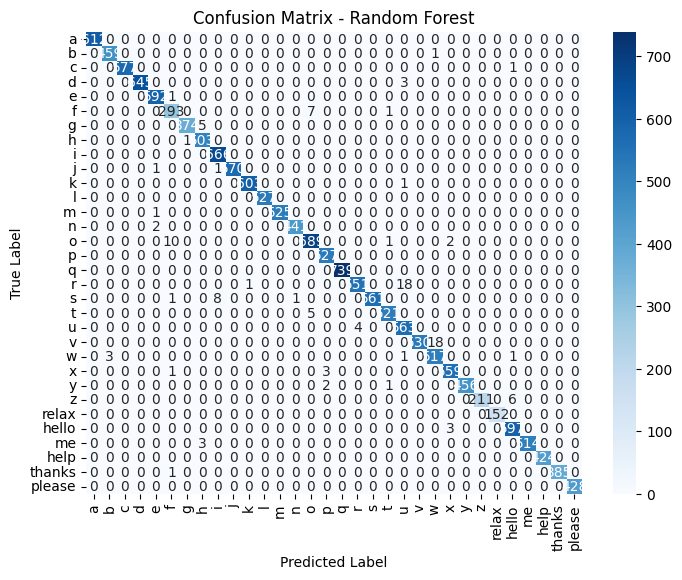

Training and evaluating SVM...


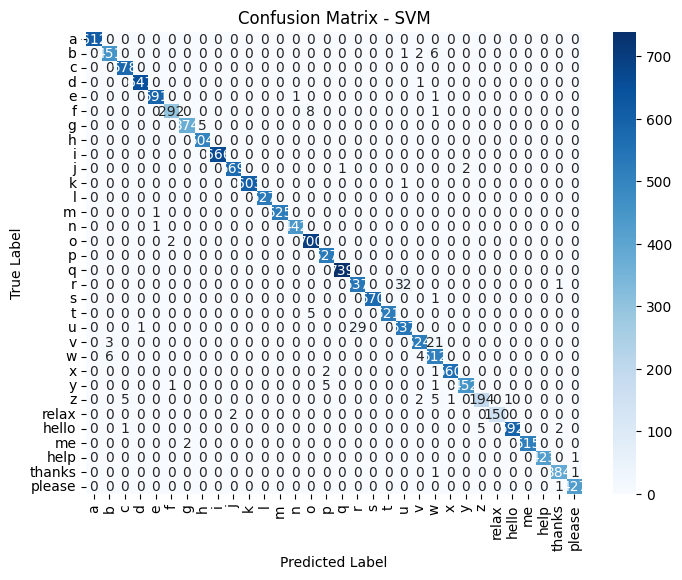

Training and evaluating KNN...


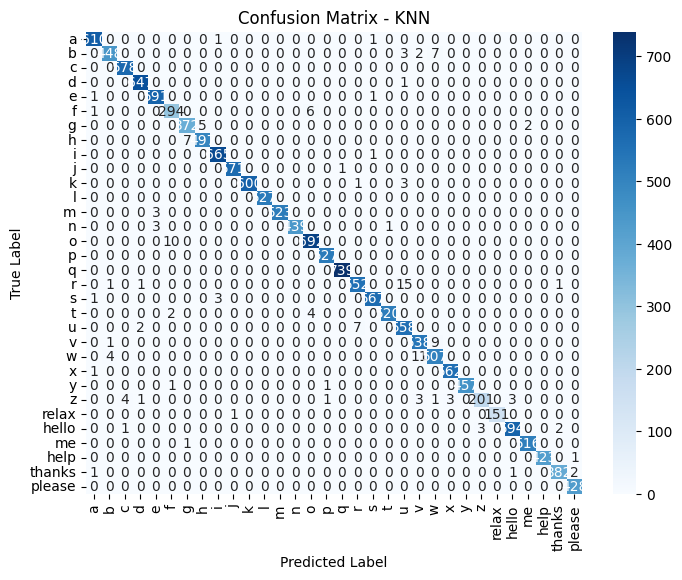

Training and evaluating Decision Tree...


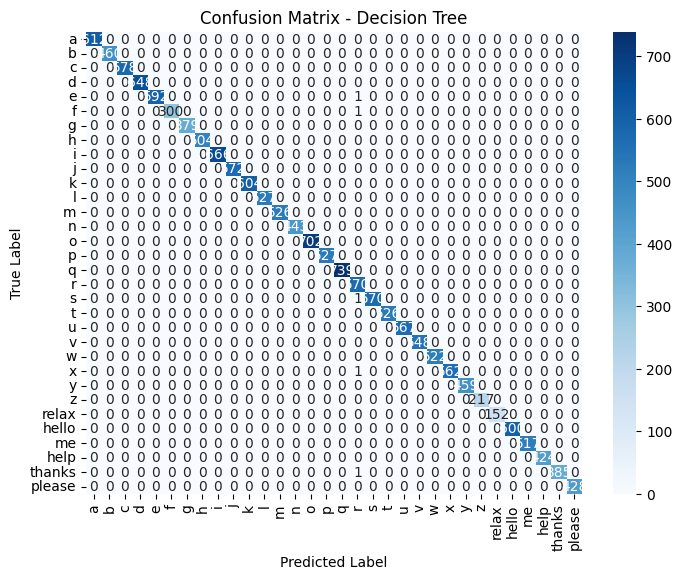

Training and evaluating Logistic Regression...


C:\Users\manoj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


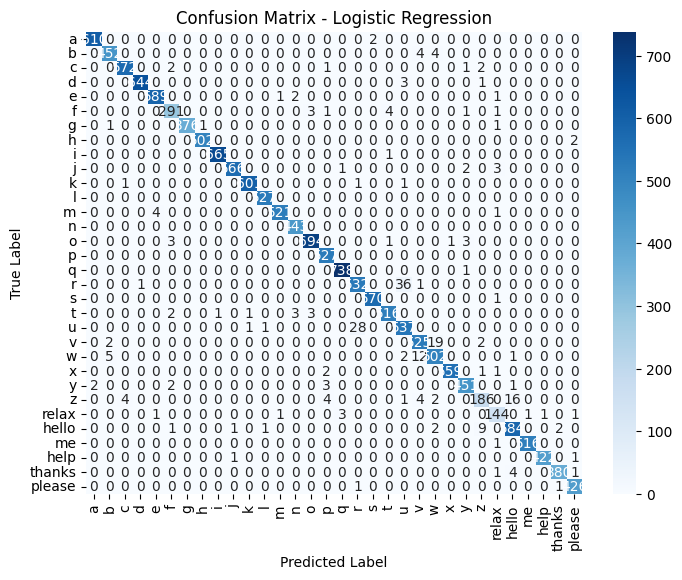

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from os.path import basename

# Load data
fileNames = ["a.csv","b.csv","c.csv","d.csv","e.csv","f.csv","g.csv","h.csv","i.csv","j.csv",
             "k.csv","l.csv","m.csv","n.csv","o.csv","p.csv","q.csv","r.csv","s.csv","t.csv",
             "u.csv","v.csv","w.csv","x.csv","y.csv","z.csv","relax.csv",
             "hello.csv","me.csv","help.csv","thanks.csv","please.csv"]

def load_features(files):
    dataset = None
    classmap = {}
    for class_idx, filename in enumerate(files):
        class_name = basename(filename)[:-4]
        classmap[class_idx] = class_name
        samples = np.genfromtxt(filename, delimiter=',', filling_values=0.0)
        labels = np.ones((len(samples), 1)) * class_idx
        samples = np.hstack((samples, labels))
        dataset = samples if dataset is None else np.vstack((dataset, samples))

    return dataset, classmap

def train_classifier(classifier, features):
    X, y = features[:, :-1], features[:, -1]
    return classifier.fit(X, y)

def plot_confusion_matrix(model_name, cm):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=classmap.values(), yticklabels=classmap.values())
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

if __name__ == '__main__':
    features, classmap = load_features(fileNames)
    X_train, X_test, y_train, y_test = train_test_split(features[:, :-1], features[:, -1], test_size=0.2, random_state=42)

    classifiers = {
        "Random Forest": RandomForestClassifier(20, max_depth=10),
        "SVM": SVC(),
        "KNN": KNeighborsClassifier(),
        "Decision Tree": DecisionTreeClassifier(),
        "Logistic Regression": LogisticRegression()
    }

    for name, clf in classifiers.items():
        print(f"Training and evaluating {name}...")
        trained_clf = train_classifier(clf, features)
        y_pred = trained_clf.predict(X_test)
        cm = confusion_matrix(y_test, y_pred)
        plot_confusion_matrix(name, cm)


In [3]:
import numpy as np
import pandas as pd
from os.path import basename
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

fileNames = ["a.csv","b.csv","c.csv","d.csv","e.csv","f.csv","g.csv","h.csv","i.csv","j.csv",
             "k.csv","l.csv","m.csv","n.csv","o.csv","p.csv","q.csv","r.csv","s.csv","t.csv",
             "u.csv","v.csv","w.csv","x.csv","y.csv","z.csv","relax.csv",
             "hello.csv","me.csv","help.csv","thanks.csv","please.csv"]

def load_features(files):
    dataset = None
    classmap = {}
    for class_idx, filename in enumerate(files):
        class_name = basename(filename)[:-4]
        classmap[class_idx] = class_name
        samples = np.genfromtxt(filename, delimiter=',', filling_values=0.0)
        labels = np.ones((len(samples), 1)) * class_idx
        samples = np.hstack((samples, labels))
        dataset = samples if dataset is None else np.vstack((dataset, samples))

    return dataset, classmap

def get_classifier():
    return RandomForestClassifier(20, max_depth=10)

if __name__ == '__main__':
    performance_data = []
    overall_accuracy = []
    overall_precision = []
    overall_recall = []
    overall_f1 = []
    features, classmap = load_features(fileNames)
    
    for i, filename in enumerate(fileNames):
        X, y = features[:, :-1], features[:, -1]

        # Splitting the dataset into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Training the classifier
        classifier = get_classifier()
        classifier.fit(X_train, y_train)

        # Predict labels for the testing set
        y_pred = classifier.predict(X_test)

        # Evaluate model performance
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted')
        f1 = f1_score(y_test, y_pred, average='weighted')

        overall_accuracy.append(accuracy)
        overall_precision.append(precision)
        overall_recall.append(recall)
        overall_f1.append(f1)

        performance_data.append({
            'File': filename,
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1 Score': f1
        })

    # Calculate overall performance metrics
    overall_metrics = {
        'Overall Accuracy': np.mean(overall_accuracy),
        'Overall Precision': np.mean(overall_precision),
        'Overall Recall': np.mean(overall_recall),
        'Overall F1 Score': np.mean(overall_f1)
    }

    # Append overall metrics to performance data
    performance_data.append(overall_metrics)

    # Create a DataFrame from the performance data
    performance_df = pd.DataFrame(performance_data)

    # Save the DataFrame to a CSV file
    performance_df.to_csv('performance_metrics.csv', index=False)

    print("Performance metrics saved to 'performance_metrics.csv' file.")


PermissionError: [Errno 13] Permission denied: 'performance_metrics.csv'

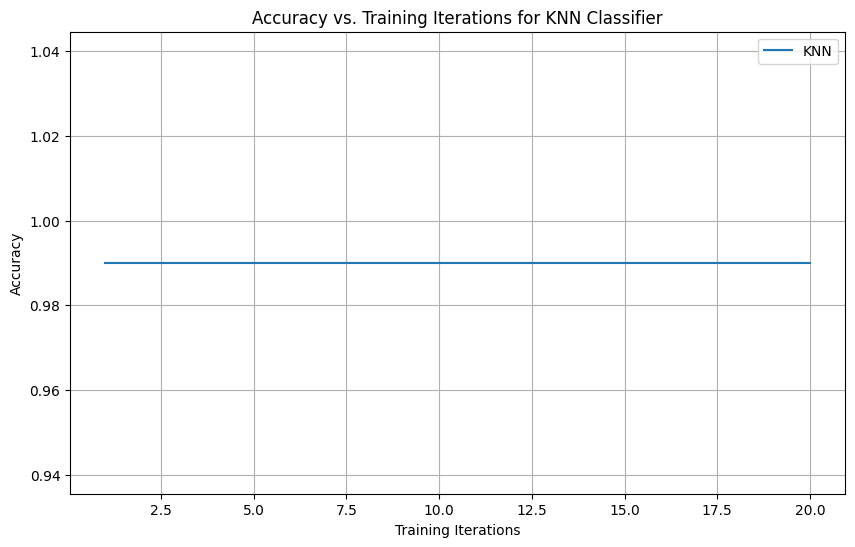

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

fileNames = ["a.csv","b.csv","c.csv","d.csv","e.csv","f.csv","g.csv","h.csv","i.csv","j.csv",
             "k.csv","l.csv","m.csv","n.csv","o.csv","p.csv","q.csv","r.csv","s.csv","t.csv",
             "u.csv","v.csv","w.csv","x.csv","y.csv","z.csv","relax.csv",
             "hello.csv","me.csv","help.csv","thanks.csv","please.csv"]

def load_features(files):
    dataset = None
    classmap = {}
    for class_idx, filename in enumerate(files):
        class_name = filename[:-4]
        classmap[class_idx] = class_name
        samples = np.genfromtxt(filename, delimiter=',', filling_values=0.0)
        labels = np.ones((len(samples), 1)) * class_idx
        samples = np.hstack((samples, labels))
        dataset = samples if dataset is None else np.vstack((dataset, samples))
    return dataset, classmap

def get_knn_classifier():
    return KNeighborsClassifier()

def simulate_training(classifier, features):
    accuracies = []
    for i in range(1, 21):  # Simulate 20 training iterations
        classifier.fit(features[:, :-1], features[:, -1])
        accuracy = classifier.score(features[:, :-1], features[:, -1])
        accuracies.append(accuracy)
    return accuracies

if __name__ == '__main__':
    features, classmap = load_features(fileNames)

    # KNN Classifier
    plt.figure(figsize=(10, 6))
    knn_classifier = get_knn_classifier()
    accuracies = simulate_training(knn_classifier, features)
    plt.plot(range(1, 21), accuracies, label='KNN')
    
    plt.xlabel('Training Iterations')
    plt.ylabel('Accuracy')
    plt.title('Accuracy vs. Training Iterations for KNN Classifier')
    plt.legend()
    plt.grid(True)
    plt.show()


In [5]:
import numpy as np
from os.path import basename
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

fileNames = ["a.csv","b.csv","c.csv","d.csv","e.csv","f.csv","g.csv","h.csv","i.csv","j.csv",
             "k.csv","l.csv","m.csv","n.csv","o.csv","p.csv","q.csv","r.csv","s.csv","t.csv",
             "u.csv","v.csv","w.csv","x.csv","y.csv","z.csv","relax.csv",
             "hello.csv","me.csv","help.csv","thanks.csv","please.csv"]

def load_features(files):
    dataset = None
    classmap = {}
    for class_idx, filename in enumerate(files):
        class_name = basename(filename)[:-4]
        classmap[class_idx] = class_name
        samples = np.genfromtxt(filename, delimiter=',', filling_values=0.0)
        labels = np.ones((len(samples), 1)) * class_idx
        samples = np.hstack((samples, labels))
        dataset = samples if dataset is None else np.vstack((dataset, samples))

    return dataset, classmap

def get_classifier(features):
    X, y = features[:, :-1], features[:, -1]
    return RandomForestClassifier(20, max_depth=10).fit(X, y)

def evaluate_model(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    return accuracy, precision, recall, f1

if __name__ == '__main__':
    features, classmap = load_features(fileNames)
    X, y = features[:, :-1], features[:, -1]

    # Splitting the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Training the classifier
    classifier = get_classifier(features)

    # Predict labels for the testing set
    y_pred = classifier.predict(X_test)

    # Evaluate model performance
    accuracy, precision, recall, f1 = evaluate_model(y_test, y_pred)

    # Create a DataFrame to store the performance metrics
    performance_data = {
        'Class': [classmap[i] for i in range(len(classmap))] + ['Overall'],
        'Accuracy': [accuracy_score(y_test, y_pred)] * (len(classmap) + 1),
        'Precision': [precision_score(y_test, y_pred, average='weighted')] * (len(classmap) + 1),
        'Recall': [recall_score(y_test, y_pred, average='weighted')] * (len(classmap) + 1),
        'F1-score': [f1_score(y_test, y_pred, average='weighted')] * (len(classmap) + 1)
    }

    # Convert the dictionary to a DataFrame
    performance_df = pd.DataFrame(performance_data)

    # Save the DataFrame to an Excel file
    performance_df.to_excel('performance_metrics.xlsx', index=False)

    print("Performance metrics saved to 'performance_metrics.xlsx' file.")


Performance metrics saved to 'performance_metrics.xlsx' file.


In [4]:
pip install openpyxl


   ---------------------------------------- 0.0/250.0 kB ? eta -:--:--
   ---------------------------------------- 0.0/250.0 kB ? eta -:--:--
   ---------------------------------------- 0.0/250.0 kB ? eta -:--:--
   ---------------------------------------- 0.0/250.0 kB ? eta -:--:--
   ---------------------------------------- 0.0/250.0 kB ? eta -:--:--
   ---------------------------------------- 0.0/250.0 kB ? eta -:--:--
   ---------------------------------------- 0.0/250.0 kB ? eta -:--:--
   ---------------------------------------- 0.0/250.0 kB ? eta -:--:--
   ---------------------------------------- 0.0/250.0 kB ? eta -:--:--
   ---------------------------------------- 0.0/250.0 kB ? eta -:--:--
   ---------------------------------------- 0.0/250.0 kB ? eta -:--:--
   ---------------------------------------- 0.0/250.0 kB ? eta -:--:--
   ---- ----------------------------------- 30.7/250.0 kB 1.3 MB/s eta 0:00:01
   --------- ----------------------------- 61.4/250.0 kB 825.8 kB/s e

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from os.path import basename
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

fileNames = ["a.csv", "b.csv", "c.csv", "d.csv", "e.csv", "f.csv", "g.csv", "h.csv", "i.csv", "j.csv",
             "k.csv", "l.csv", "m.csv", "n.csv", "o.csv", "p.csv", "q.csv", "r.csv", "s.csv", "t.csv",
             "u.csv", "v.csv", "w.csv", "x.csv", "y.csv", "z.csv", "relax.csv",
             "hello.csv", "me.csv", "help.csv", "thanks.csv", "please.csv"]

def load_features(files):
    dataset = None
    classmap = {}
    for class_idx, filename in enumerate(files):
        class_name = basename(filename)[:-4]
        classmap[class_idx] = class_name
        samples = np.genfromtxt(filename, delimiter=',', filling_values=0.0)
        labels = np.ones((len(samples), 1)) * class_idx
        samples = np.hstack((samples, labels))
        dataset = samples if dataset is None else np.vstack((dataset, samples))

    return dataset, classmap

def get_accuracy(features, num_samples):
    accuracy_list = []
    for i in range(1, num_samples + 1):
        subset_features = features[:i, :]
        if len(subset_features) <= 1:
            accuracy_list.append(0)  # Append 0 accuracy for subsets with 1 or fewer samples
            continue
        X_train, X_test, y_train, y_test = train_test_split(subset_features[:, :-1], subset_features[:, -1],
                                                            test_size=0.2, random_state=42)
        classifier = RandomForestClassifier(n_estimators=20, max_depth=10)
        classifier.fit(X_train, y_train)
        y_pred = classifier.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        accuracy_list.append(accuracy)
    return accuracy_list


if __name__ == '__main__':
    features, classmap = load_features(fileNames)
    num_samples = features.shape[0]
    
    accuracy_list = get_accuracy(features, num_samples)

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, num_samples + 1), accuracy_list, marker='o', linestyle='-')
    plt.title('Accuracy vs. Increasing Samples')
    plt.xlabel('Number of Samples')
    plt.ylabel('Accuracy')
    plt.grid(True)
    plt.show()


KeyboardInterrupt: 

In [11]:
pip install seaborn
pip install matplotlib


SyntaxError: invalid syntax (2083136434.py, line 1)

In [23]:
fileNames = ["a.csv", "b.csv", "c.csv", "d.csv", "e.csv", "f.csv", "g.csv", "h.csv", "i.csv", "j.csv",
             "k.csv", "l.csv", "m.csv", "n.csv", "o.csv", "p.csv", "q.csv", "r.csv", "s.csv", "t.csv",
             "u.csv", "v.csv", "w.csv", "x.csv", "y.csv", "z.csv", "relax.csv",
             "hello.csv", "me.csv", "help.csv", "thanks.csv"]

for filename in fileNames:
    lines_to_keep = []
    with open(filename, 'r') as file:
        lines = file.readlines()
        for line_num, line in enumerate(lines, 1):  # Track line number
            # Check if the line has the expected number of columns
            if len(line.split(',')) == 23:
                lines_to_keep.append(line)
            else:
                print(f"File '{filename}', line {line_num}: Deleted due to incorrect number of columns")

    # Rewrite the file with only the lines containing the correct number of columns
    with open(filename, 'w') as file:
        file.writelines(lines_to_keep)


In [10]:
import pandas as pd

fileNames = ["a.csv","b.csv","c.csv","d.csv","e.csv","f.csv","g.csv","h.csv","i.csv","j.csv",
             "k.csv","l.csv","m.csv","n.csv","o.csv","p.csv","q.csv","r.csv","s.csv","t.csv",
             "u.csv","v.csv","w.csv","x.csv","y.csv","z.csv","relax.csv",
             "hello.csv","me.csv","help.csv","thanks.csv"]

def check_missing_values_and_columns(files):
    for filename in files:
        df = pd.read_csv(filename)
        num_columns = len(df.columns)
        if num_columns != 23:
            print(f"File '{filename}' has {num_columns} columns instead of 23.")
        else:
            print(f"Checking missing values in '{filename}':")
            missing_values = df.isnull().sum()
            if missing_values.sum() == 0:
                print("No missing values found.")
            else:
                print("Missing values found:")
                print(missing_values)

check_missing_values_and_columns(fileNames)


Checking missing values in 'a.csv':
No missing values found.
Checking missing values in 'b.csv':
No missing values found.
Checking missing values in 'c.csv':
No missing values found.
Checking missing values in 'd.csv':
No missing values found.
Checking missing values in 'e.csv':
No missing values found.
Checking missing values in 'f.csv':
No missing values found.
Checking missing values in 'g.csv':
No missing values found.
Checking missing values in 'h.csv':
No missing values found.
Checking missing values in 'i.csv':
No missing values found.
Checking missing values in 'j.csv':
No missing values found.
Checking missing values in 'k.csv':
No missing values found.
Checking missing values in 'l.csv':
No missing values found.
Checking missing values in 'm.csv':
No missing values found.
Checking missing values in 'n.csv':
No missing values found.
Checking missing values in 'o.csv':
No missing values found.
Checking missing values in 'p.csv':
Missing values found:
finger 1     0
 finger 2   

In [18]:
pip install micromlgen


Note: you may need to restart the kernel to use updated packages.


In [20]:
pip install seaborn


  Using cached matplotlib-3.8.4-cp311-cp311-win_amd64.whl.metadata (5.9 kB)
  Using cached contourpy-1.2.1-cp311-cp311-win_amd64.whl.metadata (5.8 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.51.0-cp311-cp311-win_amd64.whl.metadata (162 kB)
  Using cached kiwisolver-1.4.5-cp311-cp311-win_amd64.whl.metadata (6.5 kB)
  Using cached pillow-10.3.0-cp311-cp311-win_amd64.whl.metadata (9.4 kB)
  Using cached pyparsing-3.1.2-py3-none-any.whl.metadata (5.1 kB)
   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   ---- ---------------------------------- 30.7/294.9 kB 435.7 kB/s eta 0:00:01
   ----- --------------------------------- 41.0/294.9 kB 388.9 kB/s eta 0:00:01
   ------------------ ------------------- 143.4/294.9 kB 944.1 kB/s eta 0:00:01
   ------------------ ------------------

In [19]:
pip install matplotlib


ERROR: THESE PACKAGES DO NOT MATCH THE HASHES FROM THE REQUIREMENTS FILE. If you have updated the package versions, please update the hashes. Otherwise, examine the package contents carefully; someone may have tampered with them.
    unknown package:
        Expected sha256 8080d5081a86e690d7688ffa542532e87f224c38a6ed71f8fbed34dd1d9fedae
             Got        5843f7c14b7c0612b1eab07a4ecd6f3cf29a189061467f735099774c8f160b55




     ---------------------------------------- 0.0/162.8 kB ? eta -:--:--
     -- ------------------------------------- 10.2/162.8 kB ? eta -:--:--
     -- ------------------------------------- 10.2/162.8 kB ? eta -:--:--
     --------- --------------------------- 41.0/162.8 kB 393.8 kB/s eta 0:00:01
     ------------- ----------------------- 61.4/162.8 kB 469.7 kB/s eta 0:00:01
     ------------- ----------------------- 61.4/162.8 kB 469.7 kB/s eta 0:00:01
     ------------- ----------------------- 61.4/162.8 kB 469.7 kB/s eta 0:00:01
     ---------------------- ------------- 102.4/162.8 kB 422.8 kB/s eta 0:00:01
     ---------------------- ------------- 102.4/162.8 kB 422.8 kB/s eta 0:00:01
     ------------------------ ----------- 112.6/162.8 kB 328.2 kB/s eta 0:00:01
     --------------------------- -------- 122.9/162.8 kB 343.4 kB/s eta 0:00:01
     ----------------------------- ------ 133.1/162.8 kB 327.7 kB/s eta 0:00:01
     ------------------------------- ---- 143.4/162.8 kB 3